# Comparative Study : Ensemble learning vs Evolutionary learning on Higgs Boson dataset

*Sarujan DENSON, Stella HU - DIA2 A5 ALT ESILV - Advanced Machine Learning II*

The dataset contains features derived from particle collision events to
classify whether an event is a signal (Higgs boson) or background noise. The aim of this project is to compare different techniques of ensemble learning with evolutionary learning by evaluating and analyzing the performances of the different models on this classification task.

## 1. Dataset Preprocessing

### Load the dataset and take a sample of data

So, first we load the Higgs Boson dataset.

In [28]:
import pandas as pd

# Load the dataset
url = "atlas-higgs-challenge-2014-v2.csv"
data = pd.read_csv(url)

# Take a sample of the dataset
data_sample = data.sample(frac=0.1, random_state=42)

# Display the first few rows of the DataFrame to verify the changes
data_sample.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
314903,414903,120.446,33.424,94.330,4.634,-999.000,-999.000,-999.000,2.872,4.634,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.000461,s,v,0.000839
638193,738193,82.420,62.550,50.525,30.852,2.575,205.076,1.413,2.474,30.739,...,3.040,0.796,41.509,0.465,-2.238,136.635,0.631642,b,v,1.148469
224007,324007,-999.000,83.006,44.854,2.950,-999.000,-999.000,-999.000,1.566,2.950,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.391596,b,t,4.563959
35725,135725,132.118,20.056,102.543,84.839,-999.000,-999.000,-999.000,2.676,2.413,...,-0.325,-1.105,-999.000,-999.000,-999.000,82.433,0.702548,b,t,2.304116
163714,263714,76.616,4.876,46.783,47.051,-999.000,-999.000,-999.000,2.208,26.913,...,-1.645,-1.507,-999.000,-999.000,-999.000,40.670,0.022533,b,t,0.073899


Due to the performance and the computational efficiency, we took only 10% of sample from the dataset.

Description of features of the dataset :    
- EventId : An unique integer identifier of the event.
- DER_mass_MMC : The estimated mass mH
 of the Higgs boson candidate, obtained through a probabilistic phase space integration.
- DER_mass_transverse_met_lep :
The transverse mass between the missing transverse energy and the lepton.
- DER_mass_vis : The invariant mass of the hadronic tau and the lepton.
- DER_pt_h : The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.
- DER_deltaeta_jet_jet :
The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤
 1).
- DER_mass_jet_jet : The invariant mass of the two jets (undefined if PRI_jet_num ≤
 1).
- DER_prodeta_jet_jet :
The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤
 1).
- DER_deltar_tau_lep : The R separation between the hadronic tau and the lepton.
- DER_pt_tot : The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥
) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).
- DER_sum_pt :
The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).
- DER_pt_ratio_lep_tau : The ratio of the transverse momenta of the lepton and the hadronic tau.
- DER_met_phi_centrality : The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.
- DER_lep_eta_centrality : The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤1).
- PRI_tau_pt : The transverse momentum √p2x+p2y of the hadronic tau.
- PRI_tau_eta : The pseudorapidity η
 of the hadronic tau.
- PRI_tau_phi : The azimuth angle ϕ
 of the hadronic tau.
- PRI_lep_pt : The transverse momentum √p2x+p2y of the lepton (electron or muon).
- PRI_lep_eta : The pseudorapidity η
 of the lepton.
- PRI_lep_phi : The azimuth angle ϕ
 of the lepton.
- PRI_met : The missing transverse energy
- PRI_met_phi : The azimuth angle ϕ
 of the mssing transverse energy
- PRI_met_sumet : The total transverse energy in the detector.
- PRI_jet_num : The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3).
- PRI_jet_leading_pt : The transverse momentum √p2x+p2y of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0).
- PRI_jet_leading_eta : The pseudorapidity η
 of the leading jet (undefined if PRI jet num = 0).
- PRI_jet_leading_phi : The azimuth angle ϕ of the leading jet (undefined if PRI jet num = 0).
- PRI_jet_subleading_pt : The transverse momentum √p2x+p2y
 of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤
 1).
- PRI_jet_subleading_eta : The pseudorapidity η
 of the subleading jet (undefined if PRI_jet_num ≤1).
- PRI_jet_subleading_phi :
The azimuth angle ϕ
 of the subleading jet (undefined if PRI_jet_num ≤ 1).
- PRI_jet_all_pt :
The scalar sum of the transverse momentum of all the jets of the events.
- Weight : The event weight wi
- Label : The event label (string) yi ∈ {s,b} (s for signal, b for background).
- KaggleSet : String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused.
- KaggleWeight : Weight normalised within each Kaggle dataset.


### Remove unnecessary columns and we transform the 'Label' column

In [32]:
# Remove unnecessary columns
del data_sample['EventId']
del data_sample['Weight']
del data_sample['KaggleSet']
del data_sample['KaggleWeight']

# Transform the 'Label' column to binary values 0/1
data_sample['Label'] = data_sample['Label'].apply(lambda x: 1 if x == 's' else 0)

# Display the first few rows of the DataFrame to verify the changes
data_sample.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
314903,120.446,33.424,94.330,4.634,-999.000,-999.000,-999.000,2.872,4.634,84.590,...,151.591,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1
638193,82.420,62.550,50.525,30.852,2.575,205.076,1.413,2.474,30.739,188.423,...,202.892,3,64.894,3.040,0.796,41.509,0.465,-2.238,136.635,0
224007,-999.000,83.006,44.854,2.950,-999.000,-999.000,-999.000,1.566,2.950,65.115,...,100.760,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
35725,132.118,20.056,102.543,84.839,-999.000,-999.000,-999.000,2.676,2.413,208.517,...,148.475,1,82.433,-0.325,-1.105,-999.000,-999.000,-999.000,82.433,0
163714,76.616,4.876,46.783,47.051,-999.000,-999.000,-999.000,2.208,26.913,93.029,...,152.760,1,40.670,-1.645,-1.507,-999.000,-999.000,-999.000,40.670,0


We remove the columns "EvenId", "Weight", "KaggleSet" and "KaggleWeight" that are not relevant for our comparative study.

And we convert the "Label" column to binary values :     

- the value "s" is converted to 1
- the value "b" is converted to 0

It's important for our classification tasks.

### We handle missing data designated by -999

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace -999 with NaN
data_sample.replace(-999, np.nan, inplace=True)

# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer on the numeric columns
data_imputed = pd.DataFrame(imputer.fit_transform(data_sample), columns=data_sample.columns)

# Display the first few rows of the DataFrame to verify the changes
data_imputed.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,120.446000,33.424,94.330,4.634,2.42271,376.983131,-0.857571,2.872,4.634,84.590,...,151.591,0.0,85.181227,0.003583,-0.019256,57.832594,-0.002496,-0.003524,-0.000,1.0
1,82.420000,62.550,50.525,30.852,2.57500,205.076000,1.413000,2.474,30.739,188.423,...,202.892,3.0,64.894000,3.040000,0.796000,41.509000,0.465000,-2.238000,136.635,0.0
2,121.841142,83.006,44.854,2.950,2.42271,376.983131,-0.857571,1.566,2.950,65.115,...,100.760,0.0,85.181227,0.003583,-0.019256,57.832594,-0.002496,-0.003524,0.000,0.0
3,132.118000,20.056,102.543,84.839,2.42271,376.983131,-0.857571,2.676,2.413,208.517,...,148.475,1.0,82.433000,-0.325000,-1.105000,57.832594,-0.002496,-0.003524,82.433,0.0
4,76.616000,4.876,46.783,47.051,2.42271,376.983131,-0.857571,2.208,26.913,93.029,...,152.760,1.0,40.670000,-1.645000,-1.507000,57.832594,-0.002496,-0.003524,40.670,0.0


In our dataset, -999 represent missing values. So we remplace them with NaN value.

We handle missing values by a SimpleImputer to fill missing values with the mean of the respective columns.

### We scale the data using MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMaxScaler on all columns of the DataFrame
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

# Display the first few rows of the DataFrame to verify the changes
data_scaled.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,0.112127,0.041799,0.086923,0.001635,0.288281,0.072982,0.475721,0.484939,0.001635,0.023985,...,0.075126,0.000000,0.054554,0.500510,0.497015,0.047507,0.500112,0.499439,0.000000,1.0
1,0.073347,0.078224,0.043061,0.010883,0.306402,0.038323,0.540041,0.410933,0.010843,0.088956,...,0.104466,1.000000,0.034496,0.838190,0.626771,0.019644,0.552096,0.143857,0.095323,0.0
2,0.113550,0.103807,0.037383,0.001041,0.288281,0.072982,0.475721,0.242097,0.001041,0.011799,...,0.046055,0.000000,0.054554,0.500510,0.497015,0.047507,0.500112,0.499439,0.000000,0.0
3,0.124030,0.025081,0.095147,0.029926,0.288281,0.072982,0.475721,0.448494,0.000851,0.101529,...,0.073344,0.333333,0.051837,0.463968,0.324208,0.047507,0.500112,0.499439,0.057509,0.0
4,0.067428,0.006097,0.039314,0.016596,0.288281,0.072982,0.475721,0.361473,0.009493,0.029266,...,0.075795,0.333333,0.010545,0.317171,0.260226,0.047507,0.500112,0.499439,0.028373,0.0


We do the MinMaxScaler to scale the features between 0 and 1. We do that because it helps the model to perform well. The input features are not very similar. So we did this in order to have features on a similar scale.

### We split the dataset into train and test sets

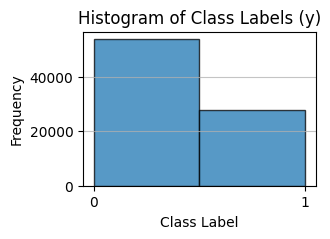

X_train shape:(57276, 30)
X_test shape:(24548, 30)
y_train shape:(57276,)
y_test shape:(24548,)


In [41]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separate the data into features and target
X = data_scaled.drop(columns=['Label'])
y = data_scaled['Label']

# Plotting the histogram for the y variable
plt.figure(figsize=(3, 2))
plt.hist(y, bins=2, edgecolor='black', alpha=0.75)  # 2 bins for binary classification
plt.title('Histogram of Class Labels (y)')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Ensure we only show 0 and 1 on the x-axis
plt.grid(axis='y', alpha=0.75)
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and test sets
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

We split the data into train and test sets. We did this for evaluating the performance of our model. So for that, we split with 70% for train set and 30% for test set.

Interpretation of the histogram :

So here, we can see the distribution of class labels (class 0 Non Higgs events and class 1 Higgs events) of the dataset. The x axis represents the class labels and the y axis represents the number of values for each class.

And we can interpret that the class containing Non Higgs Events contains more values than the class of Higgs events.

And for train et test set, we have :    
- X_train shape : The train set contains 57276 samples and each sample has 30 features.
- X_test_shape : The test set contains 24548 samples and each sample has 30 features.
- y_train_shape : The train set contains 57276 target labels.
- y_test_shape : The test set contains 24548 target labels.





In [44]:
# Convert X to a Pandas DataFrame
X_df = pd.DataFrame(X)
#print dimensionality
print(X_df.shape)
#print first lines
print(X_df.head())
# Generate descriptive statistics
X_df.describe()

(81824, 30)
   DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0      0.112127                     0.041799      0.086923  0.001635   
1      0.073347                     0.078224      0.043061  0.010883   
2      0.113550                     0.103807      0.037383  0.001041   
3      0.124030                     0.025081      0.095147  0.029926   
4      0.067428                     0.006097      0.039314  0.016596   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0              0.288281          0.072982             0.475721   
1              0.306402          0.038323             0.540041   
2              0.288281          0.072982             0.475721   
3              0.288281          0.072982             0.475721   
4              0.288281          0.072982             0.475721   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_phi  \
0            0.484939    0.001635    0.023985  ...     0.085787   
1            0.410933   

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,...,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000,81824.000000
mean,0.113550,0.061589,0.073552,0.020565,0.288281,0.072982,0.475721,0.391628,0.006693,0.070556,...,0.499668,0.108672,0.327569,0.054554,0.500510,0.497015,0.047507,0.500112,0.499439,0.051311
std,0.052606,0.044403,0.039938,0.022788,0.111980,0.044098,0.054959,0.145556,0.008416,0.073060,...,0.288672,0.072743,0.326242,0.046874,0.153208,0.224090,0.030135,0.121970,0.155444,0.068888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087114,0.023784,0.051919,0.005168,0.288281,0.072982,0.475721,0.286538,0.001000,0.019646,...,0.250995,0.059020,0.000000,0.027260,0.451957,0.410314,0.047507,0.500112,0.499439,0.000000
50%,0.112003,0.058100,0.066233,0.013664,0.288281,0.072982,0.475721,0.414094,0.004323,0.046833,...,0.497215,0.091537,0.333333,0.054554,0.500510,0.497015,0.047507,0.500112,0.499439,0.028471
75%,0.122459,0.092230,0.084739,0.028238,0.288281,0.072982,0.475721,0.501673,0.009723,0.097133,...,0.749483,0.139385,0.666667,0.054554,0.549822,0.579500,0.047507,0.500112,0.499439,0.077360
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So for the shape, we have (81824, 30), 81824 samples and 30 features.

And for the statistics, as what we have done  before, we have scaled the features between 0 and 1.
Some features (DER_deltaeta_jet_jet, DER_mass_jet_jet, and DER_prodeta_jet_jet) have same values for the 25th percentile, median, and 75th percentile due to the scaling. And for the standard deviation, we can interpret that features with a high value of std have a wide range of values.

### We apply PCA for dimensionality reduction

In [47]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training data
pca.fit(X_train)

# Transform the training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Display the shapes of the transformed training and test sets
print(f"X_train_pca shape:{X_train_pca.shape}")
print(f"X_test_pca shape:{X_test_pca.shape}")

X_train_pca shape:(57276, 12)
X_test_pca shape:(24548, 12)


We apply PCA (Principal Component Analysis) to reduce the dimensionality of the dataset while retaining 95% of the variance. It will reduce complexity and improve the performance of our model by removing noise on data.

And after the transformation with PCA, we have :       
- X_train_pca shape : The train set contains 57276 samples and each sample has now 12 features.
- X_test_pca shape : The test set contains 24548 samples and each sample has now 12 features.

## 2. Ensemble Learning

In [56]:
import time
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns


best_models = {}

In [58]:
def evaluate_model_with_search_time(model, X_train, y_train, X_test, y_test, search_time):
    # Training time (only final model training)
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    # Total training time (includes hyperparameter search)
    total_train_time = train_time + search_time

    # Prediction time
    start_pred = time.time()
    predictions = model.predict(X_test)
    end_pred = time.time()
    pred_time = end_pred - start_pred

    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Displaying classification report for each model
    print(f"\n{model.__class__.__name__} classification report\n")
    print(classification_report(y_test, predictions))

    # Displaying confusion matrix using ConfusionMatrixDisplay
    cm_display = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=["Class 0", "Class 1"]
    )
    cm_display.ax_.set_title(f"Confusion matrix of {model.__class__.__name__}")
    plt.show()

    # All metrics in a dict
    return {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 score": f1,
        "ROC-AUC": roc_auc,
        "Train time (s)": train_time,
        "Total train time (s)": total_train_time,
        "Pred time (s)": pred_time
    }


### Bagging methods

#### Random forest

In [60]:
print("Hyperparameters exploration for random forest") #searching for the best hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
# Usage of Randomized search for less computational effort
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=param_grid_rf,
                                      n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_pca, y_train)
best_rf = random_search_rf.best_estimator_
best_models['Random forest'] = best_rf
print(f"Best parameters for Random forest: {random_search_rf.best_params_}")

Hyperparameters exploration for random forest
Best parameters for Random forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}


#### Baysian

In [62]:
print("Hyperparameters exploration for Baysian bagging")
param_grid_bagging = {
    'n_estimators': [10, 50],
    'max_samples': [0.1, 0.5, 0.8]
}

bagging_model = BaggingClassifier(estimator=GaussianNB(), random_state=42)
random_search_bagging = RandomizedSearchCV(
    bagging_model,
    param_distributions=param_grid_bagging,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42)

random_search_bagging.fit(X_train_pca, y_train)
best_bagging = random_search_bagging.best_estimator_
best_models['Bayesian bagging'] = best_bagging
print(f"Best parameters for baysian bagging: {random_search_bagging.best_params_}")

Hyperparameters exploration for Baysian bagging


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for baysian bagging: {'n_estimators': 10, 'max_samples': 0.1}


### Boosting methods

#### Adaboost

In [64]:
print("Hyperparameters exploration for Adaboost")
param_grid_adaboost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1.0]
}
random_search_adaboost = RandomizedSearchCV(AdaBoostClassifier(random_state=42),
                                            param_distributions=param_grid_adaboost,
                                            n_iter=10, cv=2, scoring='accuracy', random_state=42)
random_search_adaboost.fit(X_train_pca, y_train)
best_adaboost = random_search_adaboost.best_estimator_
best_models['Adaboost'] = best_adaboost
print(f"Best parameters for Adaboost: {random_search_adaboost.best_params_}")

Hyperparameters exploration for Adaboost


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib

Best parameters for Adaboost: {'n_estimators': 100, 'learning_rate': 1.0}


#### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

print("Hyperparameters exploration for gradient boosting")
param_dist_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}


gb_model = GradientBoostingClassifier(random_state=42)

random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist_gb,
                                      n_iter=10, cv=3, scoring='accuracy', random_state=42)

random_search_gb.fit(X_train_pca, y_train)

best_gb = random_search_gb.best_estimator_
best_models['Gradient boosting'] = best_gb
print(f"Best parameters for gradient boosting: {random_search_gb.best_params_}")

Hyperparameters exploration for gradient boosting
Best parameters for gradient boosting: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}


### Results


RandomForestClassifier classification report

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82     16244
         1.0       0.67      0.51      0.58      8304

    accuracy                           0.75     24548
   macro avg       0.73      0.69      0.70     24548
weighted avg       0.74      0.75      0.74     24548



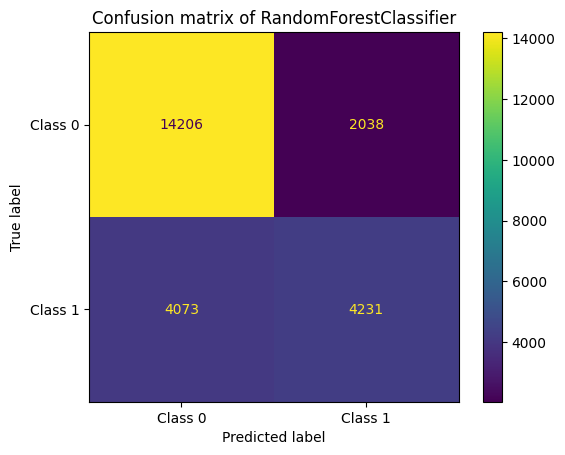


BaggingClassifier classification report

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78     16244
         1.0       0.57      0.43      0.49      8304

    accuracy                           0.70     24548
   macro avg       0.65      0.63      0.64     24548
weighted avg       0.68      0.70      0.68     24548



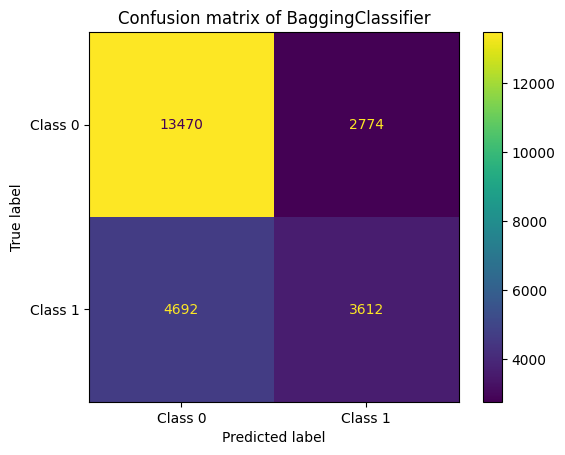

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoostClassifier classification report

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80     16244
         1.0       0.62      0.44      0.52      8304

    accuracy                           0.72     24548
   macro avg       0.69      0.65      0.66     24548
weighted avg       0.71      0.72      0.71     24548



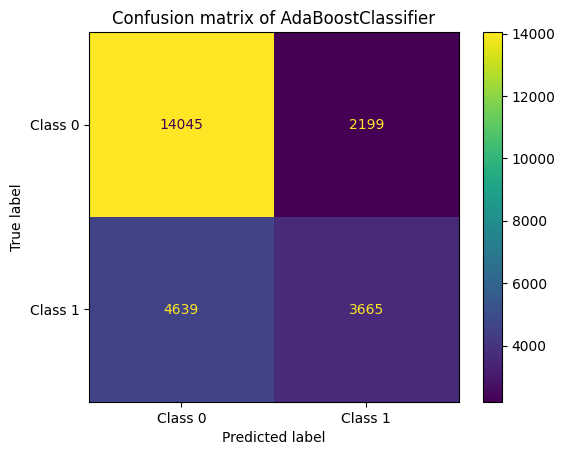


GradientBoostingClassifier classification report

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82     16244
         1.0       0.68      0.50      0.58      8304

    accuracy                           0.75     24548
   macro avg       0.73      0.69      0.70     24548
weighted avg       0.74      0.75      0.74     24548



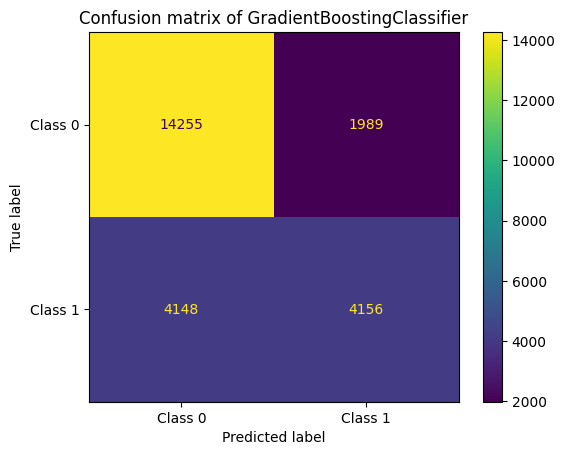


Model performance comparison:


,Model,Accuracy,Precision,Recall,F1 score,ROC-AUC,Train time (s),Total train time (s),Pred time (s)
0,RandomForestClassifier,0.751059,0.674908,0.509513,0.580663,0.806077,52.934027,225.998935,0.897235
1,BaggingClassifier,0.695861,0.565612,0.434971,0.491763,0.728910,0.210652,2.530317,0.047007
2,AdaBoostClassifier,0.721444,0.625000,0.441354,0.517363,0.767980,12.089135,36.813139,0.146410
3,GradientBoostingClassifier,0.750000,0.676322,0.500482,0.575265,0.804795,60.803338,397.389054,0.063397


In [111]:
results = []

for name, model in best_models.items():
    if name == "Random forest":
        search_time = random_search_rf.cv_results_['mean_fit_time'].sum()
    elif name == "Bayesian bagging":
        search_time = random_search_bagging.cv_results_['mean_fit_time'].sum()
    elif name == "Adaboost":
        search_time = random_search_adaboost.cv_results_['mean_fit_time'].sum()
    elif name == "Gradient boosting":
        search_time = random_search_gb.cv_results_['mean_fit_time'].sum()
    else:
        search_time = 0  # Default in case no search is performed

    result = evaluate_model_with_search_time(model, X_train_pca, y_train, X_test_pca, y_test, search_time)
    results.append(result)

# Results in dataframe
el_results_df = pd.DataFrame(results)
print("\nModel performance comparison:")
display(el_results_df)


Here, GradientBoosting seems the best classifier with an accuracy of 0.75, the highest F1 score of 0.57 and the highest ROC-AUC score of 0.80, despite it's longest training time of almost 60 seconds (on the 0.1 sample). Hovewer, its prediction time is the shortest, with 7 milliseconds. It's training + prediction time, additioned with the Random Search exploration for the best hyperparameters increases the total time to nearly 7 minutes. The usage of a Grid search and more hyperparameters would have increased the execution time much more, that it why the hyperparameter exploration time wasn't included for time measurement, as it can vary.

## 3. Evolutionary Learning : DEAP

So, first, we install deap library :

In [70]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 2.3 MB/s eta 0:00:00a 0:00:01


### We define the primitive set

We will define the components required for DEAP, including the problem domain, individuals, and evaluation function.

In [72]:
from deap import base, creator, tools, gp, algorithms
import operator

# Define the primitive set
pset = gp.PrimitiveSet("MAIN", X_train_pca.shape[1])  # Number of input features

# Add basic arithmetic operators
pset.addPrimitive(operator.add, 2) # Addition
pset.addPrimitive(operator.sub, 2) #Substraction
pset.addPrimitive(operator.mul, 2) # Multiplication
pset.addPrimitive(np.negative, 1) # Librairy numpy for the negation

# Add ephemeral constants (random numbers)
pset.addEphemeralConstant("rand", lambda: np.random.uniform(-1, 1))

# Rename arguments for clarity
pset.renameArguments(**{f"ARG{i}": f"x{i}" for i in range(X_train_pca.shape[1])})
# Each tree leaf corresponds to a variable

# Create types and fitness
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize accuracy
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

# Create toolbox
toolbox = base.Toolbox()  # black box which contains all our operators
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#We define a function to generate expressions
def generate_expression(pset, type_=None):
    return gp.genFull(pset=pset, min_=1, max_=3)

toolbox.register("compile", gp.compile, pset=pset) # Generate a function from the tree
toolbox.register("mate", gp.cxOnePoint)  # One-point crossover
# Register the mutate operator using the new function:
toolbox.register("mutate", gp.mutUniform, expr=generate_expression, pset=pset) # uniform mutation: it allows you to modify the nodes of the tree
toolbox.register("select", tools.selTournament, tournsize=2)  # Tournament selection
# When we increase the size of the tournament, it reduces diversity but we remain with a local solution
# the value 2 for the tournament is fine... but 3 starts to have more randomness

# Initialize the population
population = toolbox.population(n=100) # Test population

/opt/anaconda3/lib/python3.12/site-packages/deap/gp.py:257: RuntimeWarning: Ephemeral rand function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


First, we define the primitive set with basic operators (addition, substraction and multiplication) and we use this set to generate the genetic programs.

We create fitness to maximize accuracy.

We also create toolbox for generating expressions, individuals and the popumation. We also use genetics operators like crossover, mutation and selection.

We initialize a population test of 100.

### We define the evaluation function

In [74]:
from sklearn.metrics import accuracy_score

# Define evaluation function
def eval_classifier(individual, X, y):
    # Compile the GP tree into a callable function
    func = toolbox.compile(expr=individual)
    # Predict class (1 if output > 0, else 0)
    predictions = [1 if func(*x) > 0 else 0 for x in X]
    # Return accuracy as the fitness value
    return accuracy_score(y, predictions),   # Accuracy score of scikit learn (too easy)

toolbox.register("evaluate", eval_classifier, X=X_train_pca, y=y_train) # We do the validation

We create an evalution function that executes genetic program into a callable function, make predictions, and returns the accuracy as the fitness value.

### We enable statistics and Hall of Fame

In [76]:
# Statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)  # See stats on the entire model
stats.register("avg", np.mean)  # The mean
stats.register("std", np.std)   # The standard deviation
stats.register("min", np.min)   # The minimum
stats.register("max", np.max)   # The maximum

# Hall of Fame
hof = tools.HallOfFame(1)  # We choose the best model

We use statistics to see the progress of the model and we calculate the average, the standard deviation, the min, the max fitness values.

And we use Hall Of Fame to choose the best individual.

### We run the Genetic Algorithms

#### Algorithm eaSimple

We evaluate the performance of the genetic algorithm over 40 generations and population size of 100:

In [78]:
import time
# Initialize again the parameter for eaSimple algorithm
population = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the algorithm
start_time = time.time()
population, logbook = algorithms.eaSimple(population, toolbox,
                                          cxpb=0.5,   # Crossover probability
                                          mutpb=0.2,  # Mutation Probability
                                          ngen=40,    # Number of generations
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)
train_time = time.time() - start_time

gen	nevals	avg     	std      	min     	max     
0  	100   	0.500247	0.0640625	0.311492	0.669094
1  	66    	0.513389	0.0567342	0.341923	0.658147
2  	55    	0.534273	0.061864 	0.341923	0.670263
3  	71    	0.535133	0.0687563	0.341923	0.658147
4  	57    	0.545285	0.0704016	0.343303	0.658147
5  	54    	0.55878 	0.071912 	0.341923	0.669286
6  	64    	0.576888	0.0820168	0.341923	0.670263
7  	63    	0.564366	0.0963481	0.341906	0.660381
8  	60    	0.570137	0.0987945	0.335516	0.659508
9  	68    	0.568442	0.0976659	0.341923	0.67077 
10 	73    	0.603782	0.0848963	0.341923	0.678277
11 	72    	0.60377 	0.0940899	0.341173	0.678277
12 	70    	0.597812	0.0971005	0.341853	0.667225
13 	69    	0.615118	0.0787918	0.341923	0.677264
14 	58    	0.606874	0.094078 	0.330697	0.673476
15 	63    	0.614813	0.0786234	0.341923	0.672917
16 	52    	0.633734	0.0612091	0.364778	0.672917
17 	66    	0.616622	0.0875991	0.33782 	0.672917
18 	54    	0.62075 	0.0737857	0.345206	0.672917
19 	63    	0.617819	0.0819042	0.341923	0

So over 40 generations, the average, the minimum and the maximum show increasing valuees. It means that the genetic algorithm shows better solutions over generations.

The maximum fitness value reaches 0.690429. It means that the best individual found by the algorithm has a high fitness. But we can do better than this.

Test Accuracy (eaSimple): 0.704538047906143


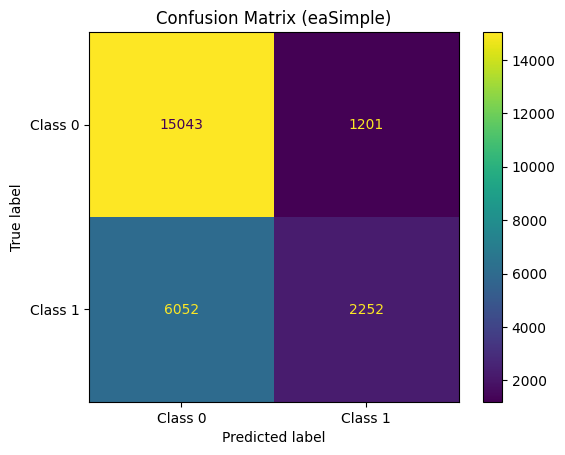

Classification Report (eaSimple):
              precision    recall  f1-score   support

         0.0       0.71      0.93      0.81     16244
         1.0       0.65      0.27      0.38      8304

    accuracy                           0.70     24548
   macro avg       0.68      0.60      0.59     24548
weighted avg       0.69      0.70      0.66     24548



In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Test the best individual
best_individual = hof[0]
best_func = toolbox.compile(expr=best_individual)
start_time = time.time()
test_predictions = [1 if best_func(*x) > 0 else 0 for x in X_test_pca]
pred_time = time.time() - start_time

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy (eaSimple): {test_accuracy}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.title("Confusion Matrix (eaSimple)")
plt.show()

# Print classification report
print("Classification Report (eaSimple):")
print(classification_report(y_test, test_predictions))

Thanks to the confusion matrix, we can see that :

- The model predicts correctly 15594 Non-Higgs.
- The model predicts correctly 1387 Higgs
- The model predicts incorrectly 650 Higgs but it has to be Non-Higgs
- The model predicts incorrectly 6917 Non-Higgs but it has to be Higgs


And thanks to the classification report, we can see that :    
- The model performs well for identifying Non Higgs Events with high recall (0.96) and a good F1-Score (0.81)
- But the model struggles for identifying Higgs Events with a low recall (0.18) and F1-Score (0.29)

And we can interpret that the model has a high number of true negatives. It means it is good to identify Non-Higgs events. The accuracy is around 0.70 . It means that the model is good at avoiding false positives but we need some improvements for detecting true positives.

It's likely good but we can do better by changing the values of number of generations, the type of mutations and the tournament size.

ROC Curve of eaSimple algorithm

ROC AUC (eaSimple): 0.5986298068141004


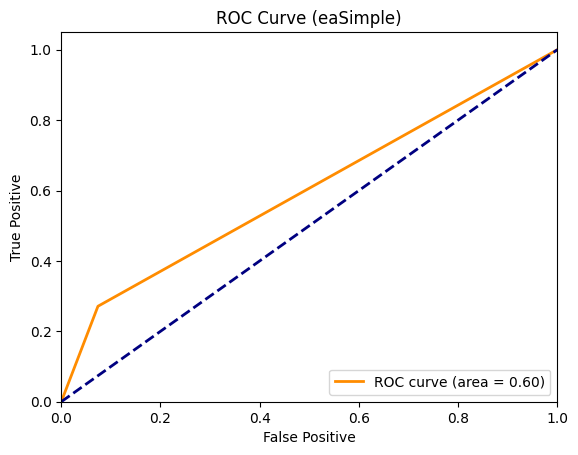

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, test_predictions)
print(f"ROC AUC (eaSimple): {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, test_predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve (eaSimple)')
plt.legend(loc="lower right")
plt.show()

The ROC Curve for the eaSimple algorithm shows that the model perfoms slightly well with an AUC score of 0.57. It can distinguish  between Higgs events and Non-Higgs events but the performance is modest.

We store the results of the algorithm in the dictionary



In [84]:
report_1 = classification_report(y_test, test_predictions, output_dict=True, zero_division=0)
print(f"Classification Report: {report_1}")

# Store results in a dictionary
results_eaSimple = {
    "Model": "eaSimple",
    "Accuracy": test_accuracy,
    "Precision": report_1.get('1.0', {}).get('precision', 0),
    "Recall": report_1.get('1.0', {}).get('recall', 0),
    "F1 score": report_1.get('1.0', {}).get('f1-score', 0),
    "ROC-AUC": roc_auc,
    "Train time (s)": train_time,
    "Pred time (s)": pred_time
}

Classification Report: {'0.0': {'precision': 0.7131073714150272, 'recall': 0.9260650086185669, 'f1-score': 0.8057526982511584, 'support': 16244.0}, '1.0': {'precision': 0.6521865044888503, 'recall': 0.27119460500963394, 'f1-score': 0.3830909245555839, 'support': 8304.0}, 'accuracy': 0.704538047906143, 'macro avg': {'precision': 0.6826469379519388, 'recall': 0.5986298068141004, 'f1-score': 0.5944218114033711, 'support': 24548.0}, 'weighted avg': {'precision': 0.6924993023684665, 'recall': 0.704538047906143, 'f1-score': 0.6627763511447526, 'support': 24548.0}}


### Algorithm eaMuPlusLambda

For this algorithm, we use additional parameters

- mu: The number of parents (μ).
- lambda_: The number of offspring (λ).

In [86]:
# Initialize again the parameters for the eaMuPlusLambda algorithm
population = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the algorithm
start_time = time.time()
population2, logbook2 = algorithms.eaMuPlusLambda(population, toolbox,
                                                  mu=30,
                                                  lambda_=60,
                                                  cxpb=0.5,
                                                  mutpb=0.2,
                                                  ngen=40,
                                                  stats=stats,
                                                  halloffame=hof,
                                                  verbose=True)
train_time = time.time() - start_time

gen	nevals	avg   	std      	min     	max     
0  	100   	0.5083	0.0716271	0.341923	0.674698
1  	46    	0.538935	0.0608232	0.47746 	0.674698
2  	47    	0.552937	0.067429 	0.495024	0.674698
3  	41    	0.580763	0.0694511	0.500244	0.674698
4  	47    	0.599596	0.055299 	0.504662	0.674698
5  	37    	0.618334	0.0577633	0.429202	0.674698
6  	38    	0.637423	0.0236115	0.586319	0.674698
7  	47    	0.637138	0.0286988	0.547577	0.674698
8  	42    	0.642321	0.0229536	0.580819	0.674698
9  	47    	0.638101	0.0369321	0.499825	0.674698
10 	35    	0.649909	0.0205337	0.568423	0.674698
11 	41    	0.654144	0.012837 	0.600583	0.674698
12 	41    	0.65754 	0.0105156	0.62775 	0.674698
13 	44    	0.658294	0.0115566	0.630386	0.674698
14 	46    	0.661723	0.0090312	0.64039 	0.674698
15 	34    	0.666995	0.00732347	0.655074	0.674698
16 	42    	0.665644	0.0115292 	0.61895 	0.674698
17 	38    	0.665916	0.0310173 	0.502095	0.674698
18 	43    	0.672815	0.00494436	0.658077	0.674698
19 	44    	0.673369	0.00412525	0.658077	

So over 40 generations, the average, the minimum and the maximum show increasing valuees. It means that the genetic algorithm shows better solutions over generations.

The maximum fitness value reaches 0.69427. It means that the best individual found by the algorithm has a high fitness.

Test Accuracy (eaMuPlusLambda): 0.7014013361577318


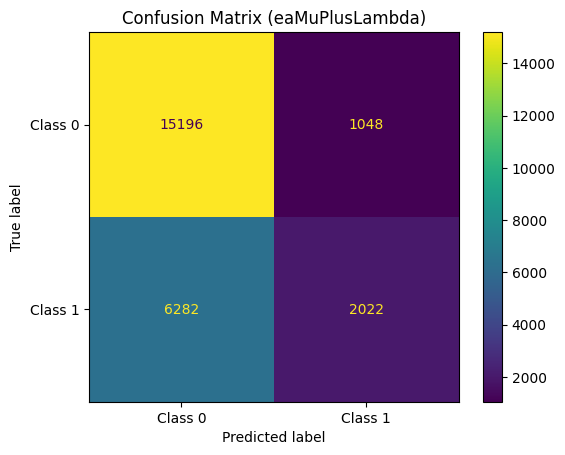

Classification Report (eaMuPlusLambda):
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81     16244
         1.0       0.66      0.24      0.36      8304

    accuracy                           0.70     24548
   macro avg       0.68      0.59      0.58     24548
weighted avg       0.69      0.70      0.65     24548



In [88]:
# Test the best individual
best_individual2 = hof[0]
best_func = toolbox.compile(expr=best_individual2)
start_time = time.time()
test_predictions = [1 if best_func(*x) > 0 else 0 for x in X_test_pca]
pred_time = time.time() - start_time

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy (eaMuPlusLambda): {test_accuracy}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.title("Confusion Matrix (eaMuPlusLambda)")
plt.show()

# Print classification report
print("Classification Report (eaMuPlusLambda):")
print(classification_report(y_test, test_predictions))

Thanks to the confusion matrix, we can see that :

- The model predicts correctly 15455 Non-Higgs.
- The model predicts correctly 1580 Higgs
- The model predicts incorrectly 789 Higgs but it has to be Non-Higgs
- The model predicts incorrectly 6724 Non-Higgs but it has to be Higgs

And thanks to the classification report we can see that :    
- The algorithm performs well for identifying Non Higgs Events with a high recall (0.89) and a good F1-Score (0.79)
- But again the model struggles for identifying Higgs events with a low recall (0.31) and F1-score (0.41) but it performs slightly well than the previous algorithm.

And we can interpret that the model has a high number of true negatives. It means it is good to identify Non-Higgs events. But now, it's also finding more Higgs events by predicting 1580 correct Higgs events than the previous algorithm eaSimple. The accuracy is around 0.694 . It means that the model is good at avoiding false positives but we need some improvements for detecting true positives.


ROC Curve of eaMuPlusLambda

ROC AUC (eaMuPlusLambda): 0.589490490397166


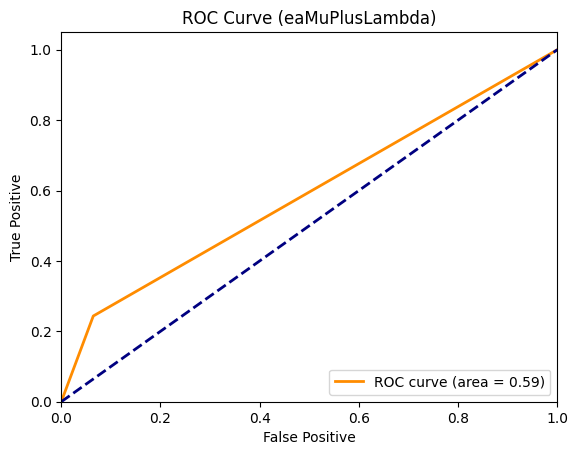

In [90]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, test_predictions)
print(f"ROC AUC (eaMuPlusLambda): {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, test_predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve (eaMuPlusLambda)')
plt.legend(loc="lower right")
plt.show()

So thanks to the ROC curve of eaMuPlusLambda, we can see that the AUC score is 0.60, it performs well than eaSimple algorithm but the performance is still modest.

eaMuPlusLambda algorithm and eaSimple algorithm show an increase in average fitness over generations. But eaMuPlusLambda performs well than eaSimple. It converges faster with a high average fitness compared to eaSimple.

We store the results of this algorithm in a dataframe

In [92]:
report_2 = classification_report(y_test, test_predictions, output_dict=True, zero_division=0)
print(f"Classification Report: {report_2}")

# Store results in a dictionary
results_eaMuPlusLambda = {
    "Model": "eaMuPlusLambda",
    "Accuracy": test_accuracy,
    "Precision": report_2.get('1.0', {}).get('precision', 0),
    "Recall": report_2.get('1.0', {}).get('recall', 0),
    "F1 score": report_2.get('1.0', {}).get('f1-score', 0),
    "ROC-AUC": roc_auc,
    "Train time (s)": train_time,
    "Pred time (s)": pred_time
}

Classification Report: {'0.0': {'precision': 0.7075146661700344, 'recall': 0.9354838709677419, 'f1-score': 0.80568368591273, 'support': 16244.0}, '1.0': {'precision': 0.6586319218241042, 'recall': 0.2434971098265896, 'f1-score': 0.35554774046069987, 'support': 8304.0}, 'accuracy': 0.7014013361577318, 'macro avg': {'precision': 0.6830732939970694, 'recall': 0.5894904903971657, 'f1-score': 0.5806157131867149, 'support': 24548.0}, 'weighted avg': {'precision': 0.6909788054462034, 'recall': 0.7014013361577318, 'f1-score': 0.6534134850395974, 'support': 24548.0}}


#### Algorithm eaMuCommaLambda

We implements a (μ,λ) evolutionary strategy. We enerates a population of λ offspringfromμ parents through mutation and crossover. The next generation is selected exclusively from the offspring, not including the parents.

In [94]:
# Initialize again the parameters for the eaMuCommaLambda algorithm
population = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the algorithm
start_time = time.time()
population3, logbook3 = algorithms.eaMuCommaLambda(population, toolbox,
                                                   mu=30,
                                                   lambda_=60,
                                                   cxpb=0.5,
                                                   mutpb=0.2,
                                                   ngen=40,
                                                   stats=stats,
                                                   halloffame=hof,
                                                   verbose=True)
train_time = time.time() - start_time

gen	nevals	avg     	std     	min     	max     
0  	100   	0.505178	0.063199	0.342185	0.658077
1  	40    	0.536878	0.053644	0.463021	0.658077
2  	44    	0.548719	0.0532456	0.491585	0.658077
3  	40    	0.587925	0.0505816	0.501484	0.658077
4  	44    	0.589968	0.0445925	0.498097	0.626021
5  	45    	0.603332	0.0323285	0.500681	0.62789 
6  	45    	0.600538	0.0365302	0.499197	0.620801
7  	39    	0.611519	0.0132343	0.572613	0.630316
8  	48    	0.613682	0.0228631	0.500751	0.630316
9  	40    	0.613111	0.0315722	0.500751	0.650988
10 	39    	0.623159	0.00886008	0.606973	0.648823
11 	44    	0.631767	0.0167082 	0.614655	0.687653
12 	40    	0.63153 	0.030836  	0.525264	0.687251
13 	35    	0.63965 	0.0351375 	0.526905	0.687391
14 	36    	0.646639	0.0402169 	0.50653 	0.687391
15 	46    	0.65567 	0.0361399 	0.541414	0.684632
16 	46    	0.672522	0.0211828 	0.612124	0.693973
17 	40    	0.681547	0.0124465 	0.619736	0.693694
18 	39    	0.67913 	0.0200527 	0.591312	0.688788
19 	39    	0.683837	0.00976241	0.6

So over 40 generations, the average, the minimum and the maximum show increasing valuees. It means that the genetic algorithm shows better solutions over generations.

The maximum fitness value reaches 0.685156. It means that the best individual found by the algorithm has a high fitness.

Test Accuracy (eaMuCommaLambda): 0.6983460974417468


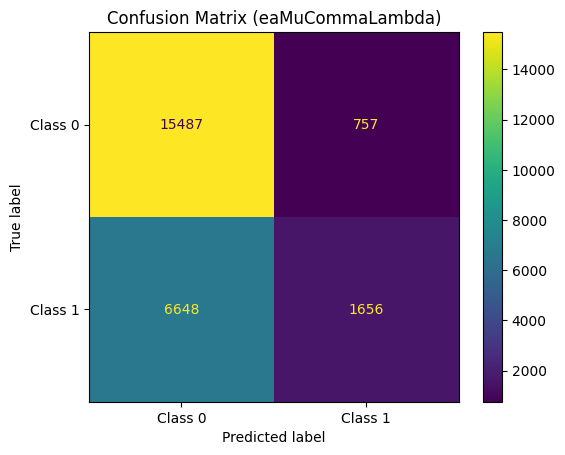

Classification Report (eaMuCommaLambda):
              precision    recall  f1-score   support

         0.0       0.70      0.95      0.81     16244
         1.0       0.69      0.20      0.31      8304

    accuracy                           0.70     24548
   macro avg       0.69      0.58      0.56     24548
weighted avg       0.70      0.70      0.64     24548



In [96]:
# Test the best individual
best_individual3 = hof[0]
best_func = toolbox.compile(expr=best_individual3)
start_time = time.time()
test_predictions = [1 if best_func(*x) > 0 else 0 for x in X_test_pca]
pred_time = time.time() - start_time

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy (eaMuCommaLambda): {test_accuracy}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.title("Confusion Matrix (eaMuCommaLambda)")
plt.show()

# Print classification report
print("Classification Report (eaMuCommaLambda):")
print(classification_report(y_test, test_predictions))

Thanks to the confusion matrix, we can see that :

- The model predicts correctly 13690 Non-Higgs.
- The model predicts correctly 3216 Higgs
- The model predicts incorrectly 2554 Higgs but it has to be Non-Higgs
- The model predicts incorrectly 5088 Non-Higgs but it has to be Higgs

And thanks to the classification report, we can see :    
- The algorithm performs well in identifying Non Higgs Events with a high recall (0.95) and a good F1-score (0.80)
- But compared to the previous algorithm, the algorithm struggles again for identifying Higgs Events with the lowest recall (0.16) and the lowest F1-score (0.26)

And we can interpret that the model has a high number of true negatives. It means it is good to identify Non-Higgs events. But now, it's also finding more Higgs events by predicting 3216 correct Higgs events than the previous 2 algorithms. The accuracy is around 0.689 . It means that the model is good at avoiding false positives but we need some improvements for detecting true positives.


ROC Curve of the algorithm eaMuCommaLambda

ROC AUC (eaMuCommaLambda): 0.5764100715533205


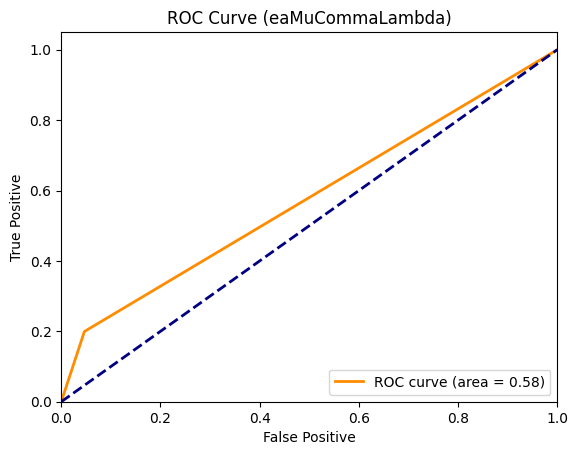

In [98]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, test_predictions)
print(f"ROC AUC (eaMuCommaLambda): {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, test_predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve (eaMuCommaLambda)')
plt.legend(loc="lower right")
plt.show()

Thanks to the ROC curve of the algorithm eaMuCommaLambda, we can see that the AUC score is 0.56, the model is still modest but performs badly than the 2 other algorithms.

We store the results of the algorithm

In [100]:
report_3 = classification_report(y_test, test_predictions, output_dict=True, zero_division=0)
print(f"Classification Report: {report_3}")

# Store results in a dictionary
results_eaMuCommaLambda = {
    "Model": "eaMuCommaLambda",
    "Accuracy": test_accuracy,
    "Precision": report_3.get('1.0', {}).get('precision', 0),
    "Recall": report_3.get('1.0', {}).get('recall', 0),
    "F1 score": report_3.get('1.0', {}).get('f1-score', 0),
    "ROC-AUC": roc_auc,
    "Train time (s)": train_time,
    "Pred time (s)": pred_time
}

# The results
print(results_eaMuCommaLambda)

Classification Report: {'0.0': {'precision': 0.6996611700926135, 'recall': 0.9533981777887219, 'f1-score': 0.8070559420516428, 'support': 16244.0}, '1.0': {'precision': 0.6862826357231662, 'recall': 0.1994219653179191, 'f1-score': 0.30904170943361015, 'support': 8304.0}, 'accuracy': 0.6983460974417468, 'macro avg': {'precision': 0.6929719029078898, 'recall': 0.5764100715533205, 'f1-score': 0.5580488257426265, 'support': 24548.0}, 'weighted avg': {'precision': 0.6951355325904182, 'recall': 0.6983460974417468, 'f1-score': 0.6385896642424468, 'support': 24548.0}}
{'Model': 'eaMuCommaLambda', 'Accuracy': 0.6983460974417468, 'Precision': 0.6862826357231662, 'Recall': 0.1994219653179191, 'F1 score': 0.30904170943361015, 'ROC-AUC': 0.5764100715533205, 'Train time (s)': 571.890538930893, 'Pred time (s)': 0.10692620277404785}


Both eaMuPlusLambda and eaMMuCommaLambda algorithms perform than eaSimple and they converge fastly and with a good stability. We can say that the 2 algorithms are the best choices for this classification task.

#### Summary of the results

In [102]:
# DataFrame to summarize the results
results_df = pd.DataFrame([results_eaSimple, results_eaMuPlusLambda, results_eaMuCommaLambda])

results_df

,Model,Accuracy,Precision,Recall,F1 score,ROC-AUC,Train time (s),Pred time (s)
0,eaSimple,0.704538,0.652187,0.271195,0.383091,0.59863,602.258031,0.164007
1,eaMuPlusLambda,0.701401,0.658632,0.243497,0.355548,0.58949,362.842331,0.216690
2,eaMuCommaLambda,0.698346,0.686283,0.199422,0.309042,0.57641,571.890539,0.106926


Thanks to the dataframe containing the results of each algorithm:
- all of them have similar accuracy (between 68% and 69%).
- eaSimple has the highest precision, eaMuPlusLambda has the lowest
- eaMuPlusLambda has the highest recall, eaMuCommaLambda has the lowest.
- eaMuPlusLambda has the highest F1-score, which indicates a better balance between precision and recall compared to the other algorithms
- eaMuPlusLambda has the highest AUC score, which indicates a good performance in distinguishing between classes
- eaMuCommaLambda has the highest training time
- eaMuCommaLambda has the lowest prediction time

So we say that for the performance on this kind of classification problem, eaMuPlusLambda seems to be the best choice for his score on precision, recall and AUC.

#### Evaluating and Visualizing the Best Individual between the 3 algorithms

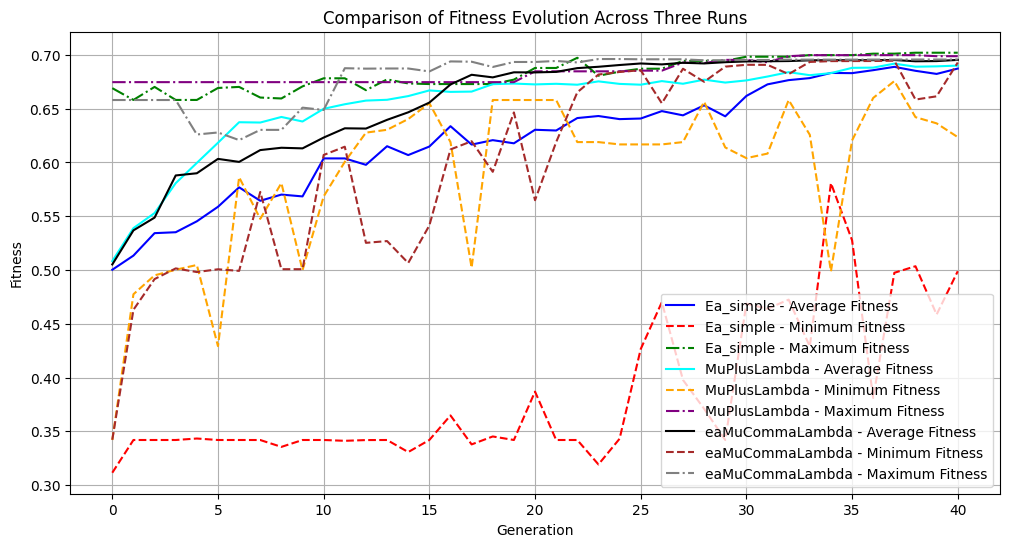

In [104]:
import matplotlib.pyplot as plt

def plot_two_logbooks(logbook1, logbook2, logbook3, labels=("Run 1", "Run 2", "Run 3")):
    """
    Plots the statistics (average, min, max) from two logbooks for comparison.

    Args:
    - logbook1: The first logbook object.
    - logbook2: The second logbook object.
    - labels: A tuple containing the labels for the two runs.
    """
    # Extract data for the first logbook
    gen1 = logbook1.select("gen")  # Generations
    avg1 = logbook1.select("avg")  # Average fitness
    min1 = logbook1.select("min")  # Minimum fitness
    max1 = logbook1.select("max")  # Maximum fitness

    # Extract data for the second logbook
    gen2 = logbook2.select("gen")
    avg2 = logbook2.select("avg")
    min2 = logbook2.select("min")
    max2 = logbook2.select("max")

    # Extract data for the third logbook
    gen3 = logbook3.select("gen")
    avg3 = logbook3.select("avg")
    min3 = logbook3.select("min")
    max3 = logbook3.select("max")

    # Plot the data
    plt.figure(figsize=(12, 6))

    # Plot statistics for the first logbook
    plt.plot(gen1, avg1, label=f"{labels[0]} - Average Fitness", color="blue", linestyle="-")
    plt.plot(gen1, min1, label=f"{labels[0]} - Minimum Fitness", color="red", linestyle="--")
    plt.plot(gen1, max1, label=f"{labels[0]} - Maximum Fitness", color="green", linestyle="-.")

    # Plot statistics for the second logbook
    plt.plot(gen2, avg2, label=f"{labels[1]} - Average Fitness", color="cyan", linestyle="-")
    plt.plot(gen2, min2, label=f"{labels[1]} - Minimum Fitness", color="orange", linestyle="--")
    plt.plot(gen2, max2, label=f"{labels[1]} - Maximum Fitness", color="purple", linestyle="-.")

    # Plot statistics for the third logbook
    plt.plot(gen3, avg3, label=f"{labels[2]} - Average Fitness", color="black", linestyle="-")
    plt.plot(gen3, min3, label=f"{labels[2]} - Minimum Fitness", color="brown", linestyle="--")
    plt.plot(gen3, max3, label=f"{labels[2]} - Maximum Fitness", color="grey", linestyle="-.")

    # Customize the plot
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Comparison of Fitness Evolution Across Three Runs")
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage:
plot_two_logbooks(logbook, logbook2, logbook3, labels=("Ea_simple", "MuPlusLambda", "eaMuCommaLambda"))

This plot is a comparison of the fitness evolution for the three different genetic algorithms :    
- eaSimple
- eaMuPlusLambda
- eaMuCommaLambda

It shows the average, the min and the max fitness values over 40 generations, tournament size of 2 and a population size of 100 for the test.

And we can see that eaMuPlusLambda and eaMuCommaLambda show faster convergence compared to eaSimple. They reach high average fitness values more quickly. eaSimple shows a slower and more gradual increase in average fitness.

eaMuPlusLambda and eaMuCommaLambda show more stable average fitness values with fewer fluctuations compared to eaSimple. But eaSimple show more variability in min fitness values with diverse population.

The 3 algorithms have a maximum fitness of 0.70 but the 2 algorithms do this more consistently than the eaSimple algorithm. The additional parameters mu and lambda give more controlled evolution process and good performance for this task.

But we can also have more good results by adjusting the population size, the number of generations, crossover, mutation or tournament size on these 3 algorithms.

## 4. Comparison between Ensemble learning and Evolutionary learning

### Global performance

For the ensemble learning models, Random forest (bagging) and Grandient boosting (boosting) get the best accuracy and F1 scores out of the four explored models.

In [113]:
results_df['Total train time (s)'] = results_df['Train time (s)'] 

results_df_total = pd.concat([el_results_df, results_df], ignore_index=True)

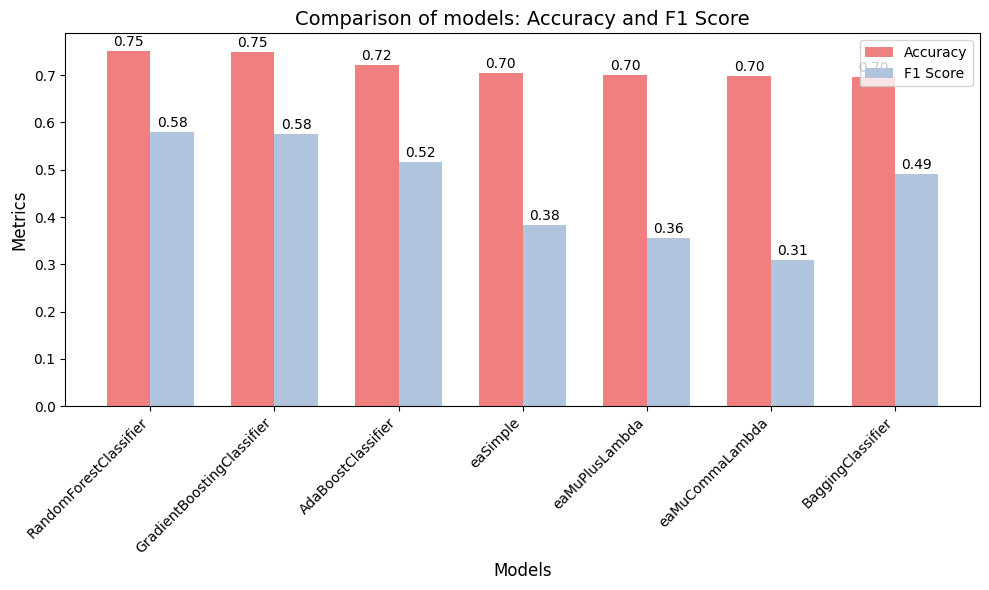

In [130]:
# Graph to see accuracies and f1 scores

results_df_total = results_df_total.sort_values(by="Accuracy", ascending=False)

# define metrics
models = results_df_total["Model"]
accuracy = results_df_total["Accuracy"]
f1_score = results_df_total["F1 score"]

#  Create histogram
x = np.arange(len(models))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, accuracy, width, label="Accuracy", color="lightcoral")

ax.bar(x + width/2, f1_score, width, label="F1 Score", color="lightsteelblue")

# Lables, titles, legends and show plot
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metrics", fontsize=12)
ax.set_title("Comparison of models: Accuracy and F1 Score", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

for i in range(len(models)):
    ax.text(x[i] - width/2, accuracy.iloc[i] + 0.01, f"{accuracy.iloc[i]:.2f}", ha='center', fontsize=10)
    ax.text(x[i] + width/2, f1_score.iloc[i] + 0.01, f"{f1_score.iloc[i]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


With an accuracy of 0.75 and an F1-score of 0.58 for the 1 class, Random forest and Gradient Boosting show the best performances at capturing relationships in the dataset. An F1-score of 0.58 indicates a balance between the precision and recall of a model, though neither is particularly strong, meaning that the models are moderately effective but still make a significant number of errors.
For example, in the Random forest classifier case, it has relatively good precision (0.67 for the 1 class) but struggles with low recal (0.51). This recall indicates that out of all the actual samples that belong to class 1.0, the model only identifies 51% correctly so the model misses a fair number of true positives. The relatively large amout of false negatives can be partly explained by the class imbalanced, where the class 1 is a minority class. 

The other ensemble learning models show similar results. On the other hand, the evolutionary learning models reach acceptable accuracies but suffer from low F1-scores(<0.4) despite eaSimple being the best model. It is mostly because of low recalls for the minority class 1, making the models to struggle even more at detecting this class and leading to much more false negatives. The low ROC-AUC scores of evolutionary learning methods show that they struggle to differenciate the 2 classes.

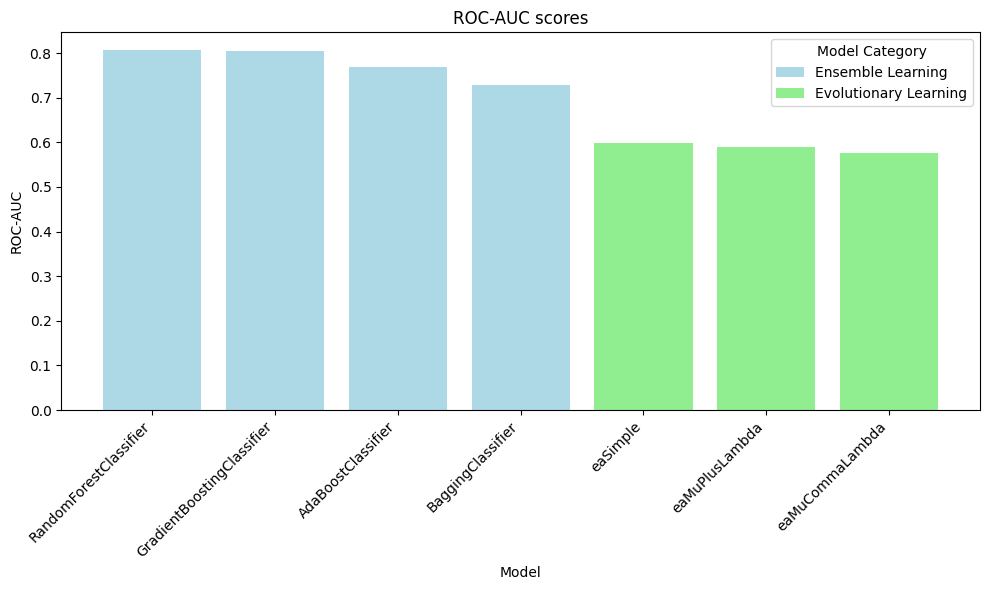

In [228]:
# Graph to see ROC-AUC scores

# Create category column
results_df_total_cat = results_df_total
results_df_total_cat['Category'] = results_df_total_cat['Model'].apply(
    lambda x: 'Ensemble Learning' if 'Classifier' in x else 'Evolutionary Learning'
)

# Graph
plt.figure(figsize=(10, 6))

# Color palette
colors = {"Ensemble Learning": "lightblue", "Evolutionary Learning": "lightgreen"}

# Draw scores by category
for category in results_df_total_cat['Category'].unique():
    category_data = results_df_total_cat[results_df_total_cat['Category'] == category]
    plt.bar(category_data['Model'], category_data['ROC-AUC'], label=category, color=colors[category])

# Lables, titles, legends and show plot
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC scores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Category')

plt.tight_layout()
plt.show()

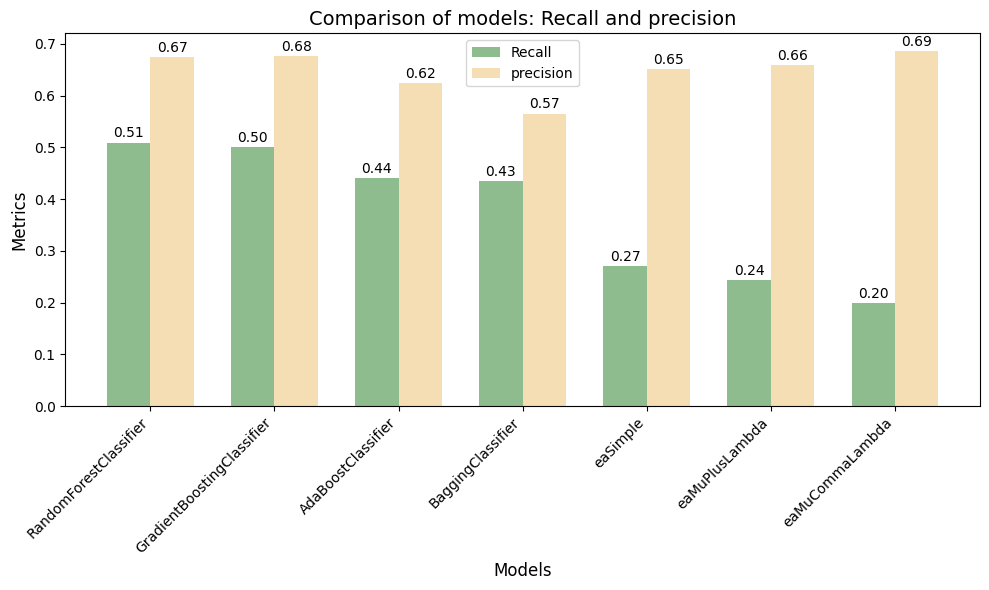

In [230]:
# Graph to see recall and precision

results_df_total = results_df_total.sort_values(by="Recall", ascending=False)
models = results_df_total["Model"]
recall = results_df_total["Recall"]
prec = results_df_total["Precision"]

# Create histogramm
x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, recall, width, label="Recall", color="darkseagreen")
ax.bar(x + width/2, prec, width, label="precision", color="wheat")

# Lables, titles, legends and show plot
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metrics", fontsize=12)
ax.set_title("Comparison of models: Recall and precision", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

for i in range(len(models)):
    ax.text(x[i] - width/2, recall.iloc[i] + 0.01, f"{recall.iloc[i]:.2f}", ha='center', fontsize=10)
    ax.text(x[i] + width/2, prec.iloc[i] + 0.01, f"{prec.iloc[i]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


When taking a look a recall and precision scores, there are suprising trends : while ensemble learning models show relatively "proportional" scores between recall and precision scores (higher recall = higher precision), the evolutionary learning models display the opposite. The model with the highest precision of all models is eaMuCommaLambda (0.69) is also the one with the lowest recall. The high precision of eaMuCommaLambda shows that it rarely predicts class 1 unless it is very confident, leading to less false positives. However, the lowest recall suggests that the model misses most true positives because it is too conservative in predicting class 1. This makes thre models more prone to detect true negative but missing most true positive because it has a tendency of overspecialization.

We can suppose with these observations that Ensemble models have a better balance between minimizing false positives and false negatives, driven by optimization on the data and their training objective of minimizing overall misclassification (usually with hyperparamater tuning), often leading to proportional gains in both precision and recall. On the other side, Evolutionary learning models evolve solutions through crossover, mutation and selection, to optimize the fitness function. These models are more prone to imbalances in how they treat precision and recall because their fitness function might not necessarily balance these two metrics evenly.

### Efficiency

In [161]:
# Times dataframe
display(results_df_total[['Model', 'Train time (s)','Total train time (s)', 'Pred time (s)']].sort_values(by="Total train time (s)", ascending=True))

,Model,Train time (s),Total train time (s),Pred time (s)
1,BaggingClassifier,0.210652,2.530317,0.047007
2,AdaBoostClassifier,12.089135,36.813139,0.146410
0,RandomForestClassifier,52.934027,225.998935,0.897235
5,eaMuPlusLambda,362.842331,362.842331,0.216690
3,GradientBoostingClassifier,60.803338,397.389054,0.063397
6,eaMuCommaLambda,571.890539,571.890539,0.106926
4,eaSimple,602.258031,602.258031,0.164007


The training time is split into two components: 
- Training time (best model): time required to fit the final model after hyperparameter tuning of ensemble learning models, or total optimization time (for evolutionary models)
- Total training time: time spent on hyperparameter search (for ensemble models) + training time or total optimization time (for evolutionary models, same as training time).

Overall, ensemble learning usually have a smaller training time than evolutionary learning models. For ensemble learning models, AdaBoost and Bayesian bagging have the lowest training times (Bayesian bagging with a total training time of 2.53) due to their simpler structures and fewer parameters. However, as seen before, they are also the explored ensemble models with the less high scores in performance comparisons. the Evolutionary models have very high training times, with eaSimple reaching more that 602 seconds (10 minutes), due to the nature of evolutionary algorithms, which rely on iterative optimization, evolving solutions through multiple generations, and evaluating fitness functions across a large search space.

These remarks show that the models with the longest training time are usually the ones with the best accuracies, making difficult the possibility to compromise between speed and performance. Nevertheless, Ensemble learning models still stand up as the best compromise for efficiency, speed and performance : Random forest classifier and Gradient boosting show better performance and their total training times are visibly lower that the majority of Evolutionary learning models here. However, it is important to take into account hyperparameter searching. Good performance for ensemble learning can be achieved with great tuning with hyperparameter search, and the total training time highly depends on the searching method and the number of hyperparameters. Sometimes, efficiency can also rely on luck, as in our case, a Randomized search is applied instead of a Grid search to decrease total training time. With a grid search, the more hyperparameters explored, the more the chance of finding a better model is increased, but the more total training time increases. Because the training time alone (without hyperparameter exploration) of ensemble learning models isn't so time costly, it is finally up to us to chose between speed and efficiency. 

When it comes to prediction time, the highest one is Random forest's, with 0.9, nearly 1 second because of all the trees that need to be parcoured, while the fastest ones are Bayesian bagging's and Gradient boosting's, which can be counter intuitive as gradient boosting's training time is relatively high. Evolutionary learning models training time show acceptable prediction but fall behing gradient boosting when it comes to prediction time, training time and performance.

In the end, the choice of the model based on the training and prediction time needs to take into account the real-life usage. If training time matters, Random forest shows good performance with a slightly lower training time and much lower total training time than Gradient boost, but in real-life applications, the prediction time can be more crucial. Indeed, Random forest classifier could pose challenges in latency-critical applications, especially for large datasets odue to the large number of decision trees being evaluated during predictions. In these situation where latency needs to be avoided during prediction, Gradient boost remains the best model to combine performance and prediction reactivity, with the very short prediction time of 0.06 seconds, making the prediction 15 times faster than random forest's. Overall, even though Evolutionary models show acceptable prediction time, their training time remain long too long to balance out their average performance, while gradient boosting have very short prediction time and good performance, making the long training time (but not longer than evolutionary learning models') more acceptable.

### Complexity and interpretability

Evolutionary learning models such as eaSimple, eaMuPlusLambda and eaMuCommaLambda and complex because of their design process. They evolve over multiple iterations, optimize their parameters and might alter the structure itself. Evolutionary learning models often lack human interpretability, as their paramaters settings can be non intuitive and the decisions non linear. Specific tools are used to help interpretability but despite the ability of evolving models to usually effectively fit the data, their usage is less desirable in applications where explainability is central. We can also interpret the metrics but it seems hard to dive deeper into the algorithms.

Ensemble learning models can also have high complexity and difficult interpretability. For bagging methods such as Random forest classifier, the model combines predictions from multiple decision trees. Each tree alone is interpretable, as it follows a clear sequence of rules. However, the more the forest grows, the more difficult it is to interpret decision-making processes, even when the individual components remain understandable. For boosting methods, the model sequentially boosts weak learners each iteration makes the overall model more opaque. This sequential boosting process adds complexity and makes it harder to see through the contributions of individual components.

While ensemble learning models are generally easier to interpret than evolutionary models, they still face challenges when scaled to large ensembles suach as large forests for example. Evolutionary models on the other hand can lead to more flexibility and optimization but often at the cost of interpretability. Finally, the choice between the approaches depends on the trade-off between performance and the need for explainability. In the cas of Higgs Bozon, we can suppose that it is important for physicists to get the more transparent information possible therefore models with higher interpretabiliy despite their complexity, especially in scientific domains such as particle physics.

### Strengths and weaknesses of Ensemble learning and Evolutionary learning models

In [183]:
#results dataframe
display(results_df_total)

,Model,Accuracy,Precision,Recall,F1 score,ROC-AUC,Train time (s),Total train time (s),Pred time (s)
0,RandomForestClassifier,0.751059,0.674908,0.509513,0.580663,0.806077,52.934027,225.998935,0.897235
3,GradientBoostingClassifier,0.750000,0.676322,0.500482,0.575265,0.804795,60.803338,397.389054,0.063397
2,AdaBoostClassifier,0.721444,0.625000,0.441354,0.517363,0.767980,12.089135,36.813139,0.146410
1,BaggingClassifier,0.695861,0.565612,0.434971,0.491763,0.728910,0.210652,2.530317,0.047007
4,eaSimple,0.704538,0.652187,0.271195,0.383091,0.598630,602.258031,602.258031,0.164007
5,eaMuPlusLambda,0.701401,0.658632,0.243497,0.355548,0.589490,362.842331,362.842331,0.216690
6,eaMuCommaLambda,0.698346,0.686283,0.199422,0.309042,0.576410,571.890539,571.890539,0.106926


#### Ensemble learning strengths

- Performance strenghs : Ensemble learning showed so far the best performances accross multiple categories such as accuracy, recall and ROC-AUC scores, especially with Random forest classifier and Gradient boost : Random forest achieves 75.11% accuracy and outperforms all evolutionary models. Similarly, Gradient boosting is very close behind. We can also note that the metrics are more balanced. Random forest and gradient boosting show better balance between precision and recall, leading to higher F1 scores. This indicates these models are better at handling imbalanced datasets like the Higgs boson dataset, where precision and recall is very important to avoid the most false negative and positive possible.
- Training efficiency : while hyperparameter tuning (with randomized search here, or grid search) increases total training time, the base training time of ensemble models is way much lower. Even with hyperparameter exploration, the overall total training times remain usually lower than evolutionary learning models. However, it is important to remember that the total training time highly depends on the number of hyperparameters defined to explore, the tuning method and the set size.
- Prediction time : ensemble learning models seems fast to predict, except the Random forest classifier because of the high numbers of trees parcoured, but the slower ensemble model Gradient boosting outperform most evolutionary models with a low fast prediction time of 0.06 second, making it ideal for real-time prediction tasks.
- Partial interpretability : for some bagging methods such as Random forest, it is possible to extract feature importance, which provides insights into how features contribute to predictions. Decision paths within a single tree can also be simple to trace. The interpretability remains hovewer partial as the high number of component makes interpretability more difficult.
- Parallelization : Ensemble learning methods, especially Random forest and gradient boosting can scale with large datasets and can be parallelized.

#### Ensemble learning weaknesses

- Depends on hyperparameter tuning : the performance and total training times of ensemble methods heavily relies on choosing the right hyperparameters like the number of trees, maximum depth or learning rates etc. Randomized search was used here to reduce total training time but a more exhaustive search like grid search might highly increase training times. Without adequate tuning, models may underperform, because their default configurations may not be the best ones to adapt well to the complexities of datasets like Higgs boson.
- Challenges in interpretability : individual decision trees may be interpretable but the aggregation of so many components in bagging methods leads to models that are harder to understand as a whole. Also, boosting methods iteratively improve weak learners, making them less transparent because predictions depend on a chain of sequential adjustments.
- Speed : Prediction time for complex ensembles such as the random forest classifier's one with almost 1 second can be a big disadvantage, especially when dealing with real-time applications that requires very low latency.
- Simpler solutions : ensemble learning methods can lack flexibility in adaptation, adding their high dependence on predefined hyperparameters.

#### Evolutionary learning strengths

- Exploration of solutions : evolutionary learning models such as eaSimple, eaMuPlusLambda, and eaMuCommaLambda, can explore vast and complex solution spaces. They are less dependent on defined hyperparameters or data structure, as they evolve their configurations over time, allowing them discover potentially unique model configurations that ensemble methods might overlook. By evolving model parameters and structures, evolutionary models can reveal still unknown interactions between features or new approaches when dealling with non linearity.
- Prediction time : their average prediction time is acceptable, making them quite usable for real-life applications that require the less latency as possible.

#### Evolutionary learning weaknesses

- Weaker performance: across all metrics, evolutionary models underperform compared to ensemble methods. Their accuracies are lower than the majority of ensemble learning models. The weakness in performance is even more observable when looking at the recalls : evolutionary models struggle with sensitivity indicating an high difficulty to classify positive samples correctly. In datasets like Higgs boson, this ow recall can be hardly acceptable when identifying positive classes is often more important than precision. This results in low F1 scores, for example eaMuPlusLambda (0.35) and eaMuCommaLambda (0.31), showing imbalance between recall and precision.
- Computational cost : training times for evolutionary models are usually higher than ensemble methods. For example, eaSimple trains in 602.26 seconds, which is more than 10 minutes, without omitting the fact that we only used 10% of the dataset in this project. These high training times are prohibitive for large datasets, limiting the practicality of these models. Moreover, evolutionary learning models are computationally expensive and scale poorly with large datasets. They also don't benefit from parallelization.
- Low interpretability:  their evolution is iterative and stochastic, making their structures complex and their parameters non intuitive.
- Sensitivity to human error : overall, we do not reject the possibility of human responsibility in the low metrics obtained. Indeed, evolutionary learning is highly dependent on the choices and parameters set at the start, such as selecting not optimal hyperparameters, poor objective function or insufficient data preprocessing. However, this shows a particular sensitivity to human errors that can lead to unsatisfying results.

### Conclusion

This comparative study shows ensemble learning methods (especially Gradient boosting) as the bests to resolve challenges such as Higgs Bozon classification, even though the metrics indicates that there is a lot of room left for improvement : 0.75 is the highest accuracy and the biggest remaining issue is the ability to correcty predict the class 1 while avoiding false negatives. This study also highlights the important part of human decisions at defining parameters for the model, when performance highly depends on the choices made by the user at first.

Both ensemble learning and evolutionary models have their pros and cons, ensemble learning being better at providing consistent performance with relatively lower computational costs and interpretability challenges. On the other hand, evolutionary models offer flexibility and adaptability but are prone to complexity, sensitivity to parameter settings and higher resources. Ultimately, building the best predictive model includes balancing between dependance on the specific goals of the task and the decisions of the user.